In [11]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
%pylab inline
warnings.filterwarnings('ignore') 

Populating the interactive namespace from numpy and matplotlib


In [13]:
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games.columns.values

array(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Developer', 'Rating'], dtype=object)

In [14]:
games.iloc[0]

Name               Wii Sports
Platform                  Wii
Year_of_Release          2006
Genre                  Sports
Publisher            Nintendo
NA_Sales                41.36
EU_Sales                28.96
JP_Sales                 3.77
Other_Sales              8.45
Global_Sales            82.53
Critic_Score               76
Critic_Count               51
User_Score                  8
User_Count                322
Developer            Nintendo
Rating                      E
Name: 0, dtype: object

In [15]:
mask = games['Year_of_Release'] >= 2010
games = games[mask]
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,NaN,NaN,NaN,NaN,NaN,NaN
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M


In [16]:
games = games.dropna()
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
40,Mario Kart 7,3DS,2011.0,Racing,Nintendo,5.03,4.02,2.69,0.91,12.66,85.0,73.0,8.2,632.0,"Retro Studios, Entertainment Analysis & Develo...",E
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12.63,88.0,58.0,6.4,1094.0,Treyarch,M


In [17]:
#we are predicting total worldwide sales using platform 

import statsmodels.api as sm
y,X = dmatrices('Global_Sales ~ Platform', data = games, return_type = 'dataframe')
model = sm.OLS(y, X)        Set up the model
result = model.fit()        Fit model (find the intercept and slopes)
print(result.summary())


"\nimport statsmodels.api as sm\ny,X = dmatrices('Global_Sales ~ Platform', data = games, return_type = 'dataframe')\nmodel = sm.OLS(y, X)        Set up the model\nresult = model.fit()        Fit model (find the intercept and slopes)\nprint(result.summary())\n"

In [18]:
#we are predicting North American Sales in millions using platform 

import statsmodels.api as sm
y,X = dmatrices('NA_Sales ~ Platform', data = games, return_type = 'dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())


"\nimport statsmodels.api as sm\ny,X = dmatrices('NA_Sales ~ Platform', data = games, return_type = 'dataframe')\nmodel = sm.OLS(y, X)       # Set up the model\nresult = model.fit()       # Fit model (find the intercept and slopes)\nprint(result.summary())\n"

In [19]:
#we are predicting sales in Europe by millions using platform 

import statsmodels.api as sm
y,X = dmatrices('EU_Sales ~ Platform', data = games, return_type = 'dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               EU_Sales   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.060
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           7.72e-10
Time:                        21:37:21   Log-Likelihood:                -2007.1
No. Observations:                2137   AIC:                             4038.
Df Residuals:                    2125   BIC:                             4106.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2150      0.050  

In [20]:
#we are predicting sales in Japan in millions using platform 

import statsmodels.api as sm
y,X = dmatrices('JP_Sales ~ Platform', data = games, return_type = 'dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               JP_Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     18.84
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           1.77e-36
Time:                        21:37:23   Log-Likelihood:                 476.06
No. Observations:                2137   AIC:                            -928.1
Df Residuals:                    2125   BIC:                            -860.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2166      0.016  

In [21]:
#we are predicting other sales aside from the ones we already looked at using the platform 

import statsmodels.api as sm
y,X = dmatrices('Other_Sales ~ Platform', data = games, return_type = 'dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Other_Sales   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     10.19
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           2.32e-18
Time:                        21:37:25   Log-Likelihood:                 385.91
No. Observations:                2137   AIC:                            -747.8
Df Residuals:                    2125   BIC:                            -679.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0494      0.016  

In [40]:
#not the year, name, the counts, the global sales, or the other sales
Y, X = dmatrices('JP_Sales ~ 0 + Platform + Genre + Publisher + Critic_Score + Developer + Rating + User_Score', games, return_type='dataframe')
y = Y['JP_Sales'].values

In [41]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
#set up regressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [43]:
#fit the data
seed(2)
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error 
prediction_train = model.predict(X_train)
mse1 = mean_squared_error(y_train,prediction_train)
print('MSE:',mse1)
print('Accuracy:',1-mse1)
#print(metrics.accuracy_score(y_train, prediction_train))

MSE: 3.344481605351171e-08
Accuracy: 0.999999966555184


In [44]:
#accuracy on the test set 
prediction = model.predict(X_test)
mse = np.square(np.subtract(y_test, prediction)).mean()
#mse = mean_squared_error(y_test, prediction)
print('MSE:',mse)
print('Accuracy:',1 - mse)
#print(metrics.accuracy_score(y_test, prediction))

MSE: 0.0772518691588785
Accuracy: 0.9227481308411215


In [45]:
#if we get overfitting (if the above cell gives us a lower accuracy than the cell above that one), then we can use max depth
model2 = DecisionTreeRegressor(max_depth=2)
result = model2.fit(X_train, y_train)

In [46]:
prediction3 = model2.predict(X_test)
mse3 = mean_squared_error(y_test,prediction3)
print('MSE:',mse3)
print('Accuracy:',1-mse3)

MSE: 0.03494043016197814
Accuracy: 0.9650595698380219


In [47]:
import graphviz

graphviz.Source(tree.export_graphviz(model2,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True)).render('games2', format='png')

'games2.png'

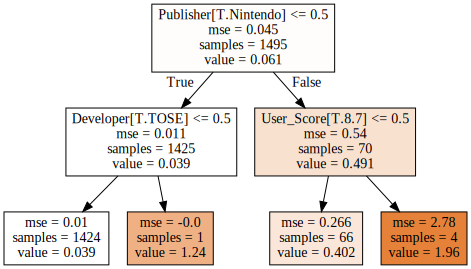

In [48]:
import graphviz
tree_vis = graphviz.Source(tree.export_graphviz(model2,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True))

tree_vis